# Political History

## Set Up

In [1]:
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
# Load in big data set
df = pd.read_csv('../data/whole_GEI_dataset.csv')

In [3]:
df

,Country,Gender Equality Index,WORK,Participation,Segregation and quality of work,MONEY,Financial resources,Economic situation,KNOWLEDGE,Attainment and participation,...,Population (%) T,Country Short,Country Long,Communist,USSR,Eurozone,Schengen Area,Religion,Region,Year
0,AT,59.5,73.7,77.0,70.6,82.5,71.9,94.6,58.9,58.9,...,100.0%,AT,Austria,No,No,Yes,Yes,Catholic,Central,2005
1,BE,66.0,71.0,72.3,69.8,81.3,73.9,89.5,68.1,70.7,...,100.0%,BE,Belgium,No,No,Yes,Yes,Catholic,Western,2005
2,BG,56.0,67.3,77.9,58.1,54.3,33.5,88.1,52.5,53.0,...,100.0%,BG,Bulgaria,Yes,No,No,No,Orthodox,Southeastern,2005
3,CY,45.9,66.3,78.5,55.9,72.6,60.5,87.1,43.4,65.5,...,100.0%,CY,Cyprus,No,No,Yes,No,Orthodox,Southeastern,2005
4,CZ,53.6,65.3,79.6,53.6,70.2,50.6,97.4,52.2,52.0,...,100.0%,CZ,Czech Republic,Yes,No,No,Yes,Catholic,Central,2005
5,DE,60.0,68.1,75.6,61.4,83.3,73.7,94.1,55.3,56.7,...,100.0%,DE,Germany,Split,No,Yes,Yes,Split Catholic and Protestant,Central,2005
6,DK,74.6,78.9,88.5,70.3,82.7,71.2,96.1,73.7,81.1,...,100.0%,DK,Denmark,No,No,No,Yes,Protestant,Northern,2005
7,EE,52.2,71.0,87.2,57.9,58.4,41.4,82.2,49.5,66.7,...,100.0%,EE,Estonia,Yes,Yes,Yes,Yes,Protestant,Central,2005
8,EL,46.8,62.5,68.0,57.5,71.9,62.2,83.2,47.2,54.3,...,100.0%,EL,Greece,No,No,Yes,Yes,Orthodox,Southeastern,2005
9,ES,62.2,68.1,70.9,65.4,73.6,63.5,85.4,59.3,68.8,...,100.0%,ES,Spain,No,No,Yes,Yes,Catholic,Southern,2005


## Analyze

### 1a. Gender Equality by Political History

In [4]:
df['Communist'].unique()

array(['No', 'Yes', 'Split', nan], dtype=object)

In [5]:
# Create separate dataframes for each economic philosophy
communist_cos = df[df['Communist'] == 'Yes']
capitalist_cos = df[df['Communist'] == 'No']

# Get the average GEI for each economic philosophy in each year
communist_avg = communist_cos.groupby(['Year'])['Gender Equality Index'].mean()
capitalist_avg = capitalist_cos.groupby(['Year'])['Gender Equality Index'].mean()

In [6]:
# Turn dataframes with averages into lists for each economic philosophy
communist = communist_avg.values.tolist()
capitalist = capitalist_avg.values.tolist()

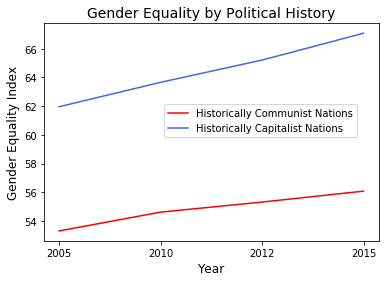

In [7]:
# Create label lists 
philosophies = ['Historically Communist Nations', 'Historically Capitalist Nations']
years = ['2005','2010','2012','2015']

# Plot lines
fig, ax = plt.subplots()
ax.plot(years, communist, color='r')
ax.plot(years, capitalist, color='royalblue')

# Add labels
plt.xlabel('Year',  size=12);
plt.ylabel('Gender Equality Index', size=12);
plt.title('Gender Equality by Political History', size=14);
plt.legend(philosophies, bbox_to_anchor=(.95, .65))

# Save graph
plt.savefig('geia_polihist.png')

### 1b. Gender Equality by Political History

In [8]:
df['USSR'].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
# Integrate former USSR status 

# Create separate dataframes for former USSR states and former satellite states
ussr_cos = df[df['USSR'] == 'Yes']
satellite_cos = df[(df['Communist'] == 'Yes') & (df['USSR'] == 'No')]

# Get the average GEI for each
ussr_avg = ussr_cos.groupby(['Year'])['Gender Equality Index'].mean()
satellite_avg = satellite_cos.groupby(['Year'])['Gender Equality Index'].mean()

# Convert them to lists
ussr = ussr_avg.values.tolist()
satellite = satellite_avg.values.tolist()

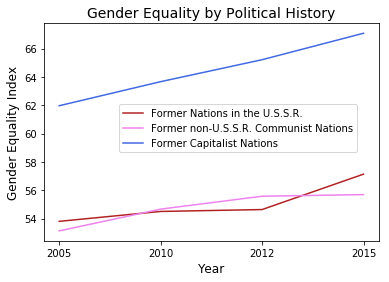

In [10]:
# Create list of economic philosophies names to use to label plot
ussr_or_no = ['Former Nations in the U.S.S.R.', 'Former non-U.S.S.R. Communist Nations', 
              'Former Capitalist Nations']

# Plot lines
fig, ax = plt.subplots()
ax.plot(years, ussr, color='firebrick')
ax.plot(years, satellite, color='violet')
ax.plot(years, capitalist, color='royalblue')

# Add labels
plt.xlabel('Year',  size=12);
plt.ylabel('Gender Equality Index', size=12);
plt.title('Gender Equality by Political History', size=14);
plt.legend(ussr_or_no, bbox_to_anchor=(.95, .65))

# Save
plt.savefig('geib_polihist.png')

### 2. Tertiary Education Graduates by Gender and Political History

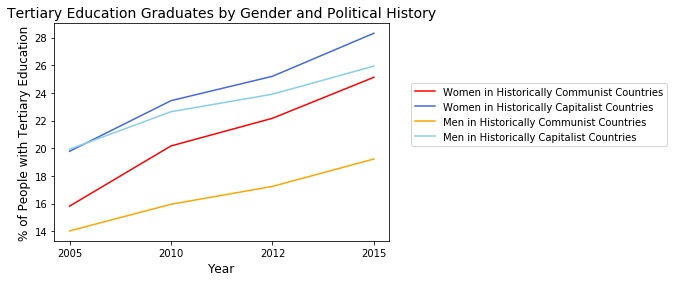

In [11]:
# Get 'Graduates of tertiary education (%) W' index averages for each
wgrad_comm_avg = communist_cos.groupby(['Year'])['Graduates of tertiary education (%) W'].mean()
wgrad_cap_avg = capitalist_cos.groupby(['Year'])['Graduates of tertiary education (%) W'].mean()
mgrad_comm_avg = communist_cos.groupby(['Year'])['Graduates of tertiary education (%) M'].mean()
mgrad_cap_avg = capitalist_cos.groupby(['Year'])['Graduates of tertiary education (%) M'].mean()

dgrad_comm_avg = wgrad_comm_avg - mgrad_comm_avg
dgrad_cap_avg = wgrad_cap_avg - mgrad_cap_avg

# Convert to lists
wgrad_comm = wgrad_comm_avg.values.tolist()
wgrad_cap = wgrad_cap_avg.values.tolist()
mgrad_comm = mgrad_comm_avg.values.tolist()
mgrad_cap = mgrad_cap_avg.values.tolist()

dgrad_comm = dgrad_comm_avg.values.tolist()
dgrad_cap = dgrad_cap_avg.values.tolist()

# Plot lines for each region on a graph
fig, ax = plt.subplots()
ax.plot(years, wgrad_comm, color='r')
ax.plot(years, wgrad_cap, color='royalblue')
ax.plot(years, mgrad_comm, color='orange')
ax.plot(years, mgrad_cap, color='skyblue')

# Add labels to the graph
gen_phil = ['Women in Historically Communist Countries', 'Women in Historically Capitalist Countries', 
            'Men in Historically Communist Countries', 'Men in Historically Capitalist Countries']

plt.xlabel('Year',  size=12);
plt.ylabel('% of People with Tertiary Education', size=12);
plt.title('Tertiary Education Graduates by Gender and Political History', size=14);
plt.legend(gen_phil, bbox_to_anchor=(1.05, .75))

# Save
plt.savefig('grad_polihist.png')

### 3. Full Time Employment Rate by Gender and Political History

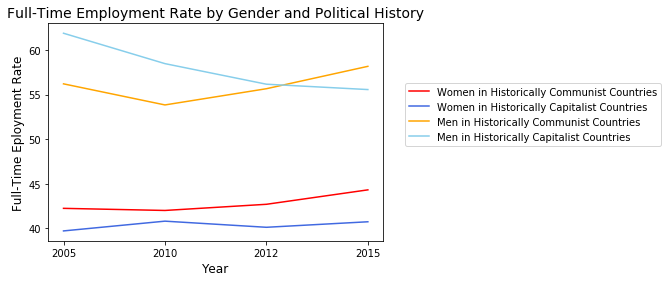

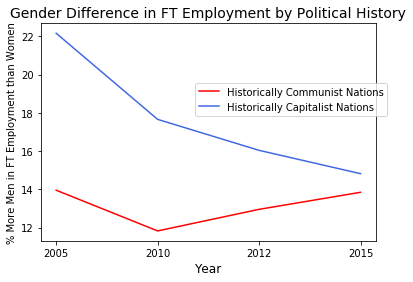

In [12]:
# Get 'Graduates of tertiary education (%) W' index averages for each
wstud_comm_avg = communist_cos.groupby(['Year'])['FTE employment rate (%) W'].mean()
wstud_cap_avg = capitalist_cos.groupby(['Year'])['FTE employment rate (%) W'].mean()
mstud_comm_avg = communist_cos.groupby(['Year'])['FTE employment rate (%) M'].mean()
mstud_cap_avg = capitalist_cos.groupby(['Year'])['FTE employment rate (%) M'].mean()

dstud_comm_avg = mstud_comm_avg - wstud_comm_avg
dstud_cap_avg = mstud_cap_avg - wstud_cap_avg

# Convert to lists
wstud_comm = wstud_comm_avg.values.tolist()
wstud_cap = wstud_cap_avg.values.tolist()
mstud_comm = mstud_comm_avg.values.tolist()
mstud_cap = mstud_cap_avg.values.tolist()

dstud_comm = dstud_comm_avg.values.tolist()
dstud_cap = dstud_cap_avg.values.tolist()

# Plot lines for each region on a graph
fig, ax = plt.subplots()
ax.plot(years, wstud_comm, color='r')
ax.plot(years, wstud_cap, color='royalblue')
ax.plot(years, mstud_comm, color='orange')
ax.plot(years, mstud_cap, color='skyblue')

# Add labels to the graph
plt.xlabel('Year',  size=12);
plt.ylabel('Full-Time Eployment Rate', size=12);
plt.title('Full-Time Employment Rate by Gender and Political History', size=14);
plt.legend(gen_phil, bbox_to_anchor=(1.05, .75))

# Plot lines for each region on a graph
fig, ax = plt.subplots()
ax.plot(years, dstud_comm, color='r')
ax.plot(years, dstud_cap, color='royalblue')

# Add labels to the graph; MORE WOMEN THAN MEN ARE STUDENTS!!!!!
plt.xlabel('Year',  size=12);
plt.ylabel('% More Men in FT Employment than Women', size=10);
plt.title('Gender Difference in FT Employment by Political History', size=14);
plt.legend(philosophies, bbox_to_anchor=(1.05, .75))

# Save
plt.savefig('fte_polihist.png')